In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
import math
class Format:
    end = '\033[0m'
    underline = '\033[4m'
    
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999991856599, 1.15049*1e5, 9260.14843445251/3600, "R12")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 118.399996544637, 1.10324*1e5, cold1_In.M, "R13")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.389991, 7.59792*1e5, 196717.751213044/3600, "R25")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 111.268891555163, 7.49874*1e5, cold2_In.M, "R26")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 113.999999747437, 19.62816*1e5, 20833.3333333333/3600, "F03")
mainH2_In.x_para = 0.25
print("F03 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.00, 19.6281600000000*1e5, mainH2_In.M, "F04")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 119.400, 29.7055300000000*1e5, 205977.899647497/3600, "R02")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.000, 29.60639*1e5, hot_In.M, "R03")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R12
M [kg/s]    =  2.5723
P [bar]     =  1.15
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.682
S [kJ/kg.K] =  39.869


Stream R13
M [kg/s]    =  2.5723
P [bar]     =  1.103
T [Kelvin]  =  118.4
H [kJ/kg]   =  1515.977
S [kJ/kg.K] =  40.795


Stream R25
M [kg/s]    =  54.6438
P [bar]     =  7.598
T [Kelvin]  =  102.39
H [kJ/kg]   =  1322.325
S [kJ/kg.K] =  31.076


Stream R26
M [kg/s]    =  54.6438
P [bar]     =  7.499
T [Kelvin]  =  111.27
H [kJ/kg]   =  1425.46
S [kJ/kg.K] =  32.096


HOT STREAMS(from ASPEN HYSYS)
F03 p-H2 mole fraction: 0.25
Stream F03
M [kg/s]    =  5.787
P [bar]     =  19.628
T [Kelvin]  =  114.0
H [kJ/kg]   =  1912.081
S [kJ/kg.K] =  36.925


Stream F04
M [kg/s]    =  5.787
P [bar]     =  19.628
T [Kelvin]  =  106.0
H [kJ/kg]   =  1799.837
S [kJ/kg.K] =  35.904


Stream R02
M [kg/s]    =  57.2161
P [bar]     =  29.706
T [Kelvin]  =  119.4
H [kJ/kg]   =  1501.751
S [kJ/kg.K] =  27.055


Stream R03
M [kg/s]    =  57.2161
P [bar]    

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R25A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R25B")
cold2B_In.printState()

Stream R25A
M [kg/s]    =  48.3458
P [bar]     =  7.598
T [Kelvin]  =  102.39
H [kJ/kg]   =  1322.325
S [kJ/kg.K] =  31.076


Stream R25B
M [kg/s]    =  6.298
P [bar]     =  7.598
T [Kelvin]  =  102.39
H [kJ/kg]   =  1322.325
S [kJ/kg.K] =  31.076




In [4]:
nParallelHx = 3

lengthPFHX = 1.7211
widthPFHX = 1.5000
heightPFHX = 2.0261
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 1.57745
widthHXA      = 1.5000
heightHXA     = 1.7765
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)
print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  1.7211
Width  [m]  =  1.5
Height [m]  =  2.0261
Volume [m3] =  5.231


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  1.57745
Width  [m]  =  1.5
Height [m]  =  1.7765
Volume [m3] =  4.204


HXB Geometry
Length [m]  =  1.7211
Width  [m]  =  1.5
Height [m]  =  0.398
Volume [m3] =  1.027




Final HX-3 Geometry
Length [m]  =  7.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  31.5


HX-B Geometry
Length [m]  =  7.0
Width  [m]  =  1.5
Height [m]  =  1.224
Volume [m3] =  12.847

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          9.33e-07       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 9.33e-07 
Maximum boundary residual: 0.00e+00


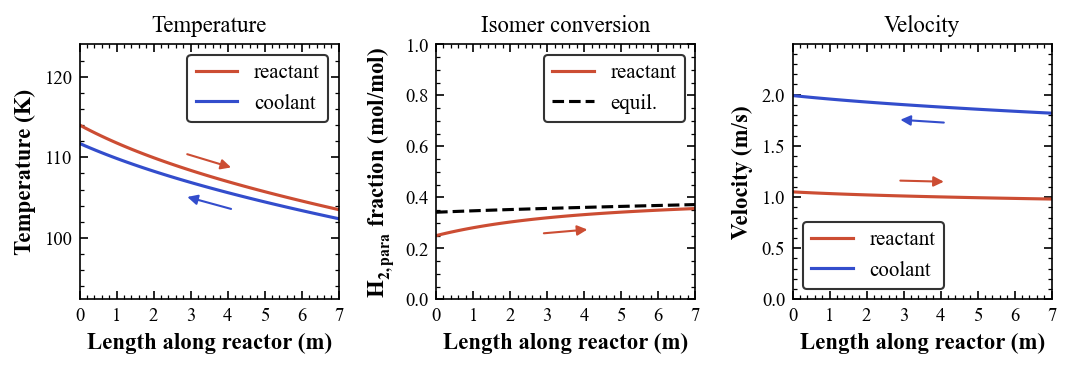

In [5]:
#Adjusted geometry
lengthPFHX = 7.0
widthPFHX = 1.5
heightPFHX = 3.0
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = heightPFHX - heightHXA
volumeHXB     = lengthHXB*widthHXB*heightHXB

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-3 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [6]:
print(results)

       Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0   0.000000              1962.816000              758.638209   
1   0.142857              1961.482252              758.663163   
2   0.285714              1960.152005              758.688038   
3   0.428571              1958.825124              758.712837   
4   0.571429              1957.501484              758.737561   
5   0.714286              1956.180966              758.762213   
6   0.857143              1954.863458              758.786794   
7   1.000000              1953.548857              758.811306   
8   1.142857              1952.237064              758.835750   
9   1.285714              1950.927987              758.860128   
10  1.428571              1949.621538              758.884441   
11  1.571429              1948.317637              758.908692   
12  1.714286              1947.016204              758.932880   
13  1.857143              1945.717168              758.957007   
14  2.000000             